In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
import matplotlib as mpl
mpl.rcParams["figure.figsize"] = (20,10)

In [2]:
df1 = pd.read_csv('C:\\Users\\PaRsAfZaR\\Downloads\\data.csv')

In [3]:
df1['price_m'] = df1.all_to_deposit.apply(lambda x: int(x * 11.66))
df2 = df1.drop(['Unnamed: 0', 'deposit', 'rent', 'time', 'all_to_deposit'], axis='columns')

In [4]:
df2['price_per_area'] = df2['price_m']/df2['area']
df2 = df2[~(df2.area<30)]
df2 = df2[~(df2.area/df2.rooms<27.87)]

In [5]:
df2

,floor,area,age,rooms,elavator,parking,Warehouse,region,district,price_m,price_per_area
0,1.0,55,7,1,1,1,0,استاد معین,9,3731,67.836364
1,3.0,45,13,1,0,1,1,آذربایجان,10,3532,78.488889
2,2.0,128,9,3,1,1,1,محمودیه,1,15158,118.421875
3,8.0,132,16,2,1,1,1,فرمانیه,1,13992,106.000000
4,2.0,105,7,2,1,1,1,شهران شمالی,5,6599,62.847619
...,...,...,...,...,...,...,...,...,...,...,...
165113,1.0,135,11,2,1,1,1,کامرانیه,1,21372,158.311111
165114,3.0,160,10,3,1,1,1,اقدسیه,1,26818,167.612500
165115,3.0,92,30,2,0,0,1,زاهد گیلانی,13,4081,44.358696
165116,1.0,110,6,2,1,1,1,نیاوران,1,13210,120.090909


In [6]:
df_dis = df2.drop(['region'], axis= 'columns')
df_dis

,floor,area,age,rooms,elavator,parking,Warehouse,district,price_m,price_per_area
0,1.0,55,7,1,1,1,0,9,3731,67.836364
1,3.0,45,13,1,0,1,1,10,3532,78.488889
2,2.0,128,9,3,1,1,1,1,15158,118.421875
3,8.0,132,16,2,1,1,1,1,13992,106.000000
4,2.0,105,7,2,1,1,1,5,6599,62.847619
...,...,...,...,...,...,...,...,...,...,...
165113,1.0,135,11,2,1,1,1,1,21372,158.311111
165114,3.0,160,10,3,1,1,1,1,26818,167.612500
165115,3.0,92,30,2,0,0,1,13,4081,44.358696
165116,1.0,110,6,2,1,1,1,1,13210,120.090909


In [7]:
df2.region = df2.region.apply(lambda x: x.strip())
location_stats = df2.groupby('region')['region'].agg('count').sort_values(ascending=False)
location_stats

region
سعادت‌آباد       14260
پونک              8133
نیاوران           5553
زعفرانیه          4670
الهیه             4273
                 ...  
شهرک دانشگاهی        2
ملک‌آباد             1
شهرک فرهنگیان        1
پامنار               1
شهرک آسمان           1
Name: region, Length: 342, dtype: int64

In [8]:
location_stats_less_than_10 = location_stats[location_stats<=120]
location_stats_less_than_10

region
بهجت‌آباد        119
درب دوم          118
اراج             118
کاروان           117
تهران‌ویلا       117
                ... 
شهرک دانشگاهی      2
ملک‌آباد           1
شهرک فرهنگیان      1
پامنار             1
شهرک آسمان         1
Name: region, Length: 169, dtype: int64

In [9]:
df2.region = df2.region.apply(lambda x: 'other' if x in location_stats_less_than_10 else x)

In [10]:
def remove_pps_outlier(df):
    df_out = pd.DataFrame()
    for key, subdf in df.groupby('region'):
        m = np.mean(subdf.price_per_area)
        st = np.std(subdf.price_per_area)
        reduced_df = subdf[(subdf.price_per_area>(m-(st))) & (subdf.price_per_area<=(m+(st)))]
        df_out = pd.concat([df_out,reduced_df], ignore_index=True)
    return df_out

In [11]:
df3 = remove_pps_outlier(df2)
df3.shape

(157609, 11)

In [12]:
df3 = df3[(df3.area <= 1000)]
df3.shape

(157567, 11)

In [13]:
def plot_scatter_chart(df,location):
    rooms2 = df[(df.region==location) & (df.rooms==2)]
    rooms3 = df[(df.region==location) & (df.rooms==3)]
    mpl.rcParams['figure.figsize'] = (15,10)
    plt.scatter(rooms2.area,rooms2.price_m,color='blue',label='2 room', s=50)
    plt.scatter(rooms3.area,rooms3.price_m,marker='+', color='green',label='3 room', s=50)
    plt.xlabel("Total Square meter Area")
    plt.ylabel("Price (milion toman)")
    plt.title(location)
    plt.legend()

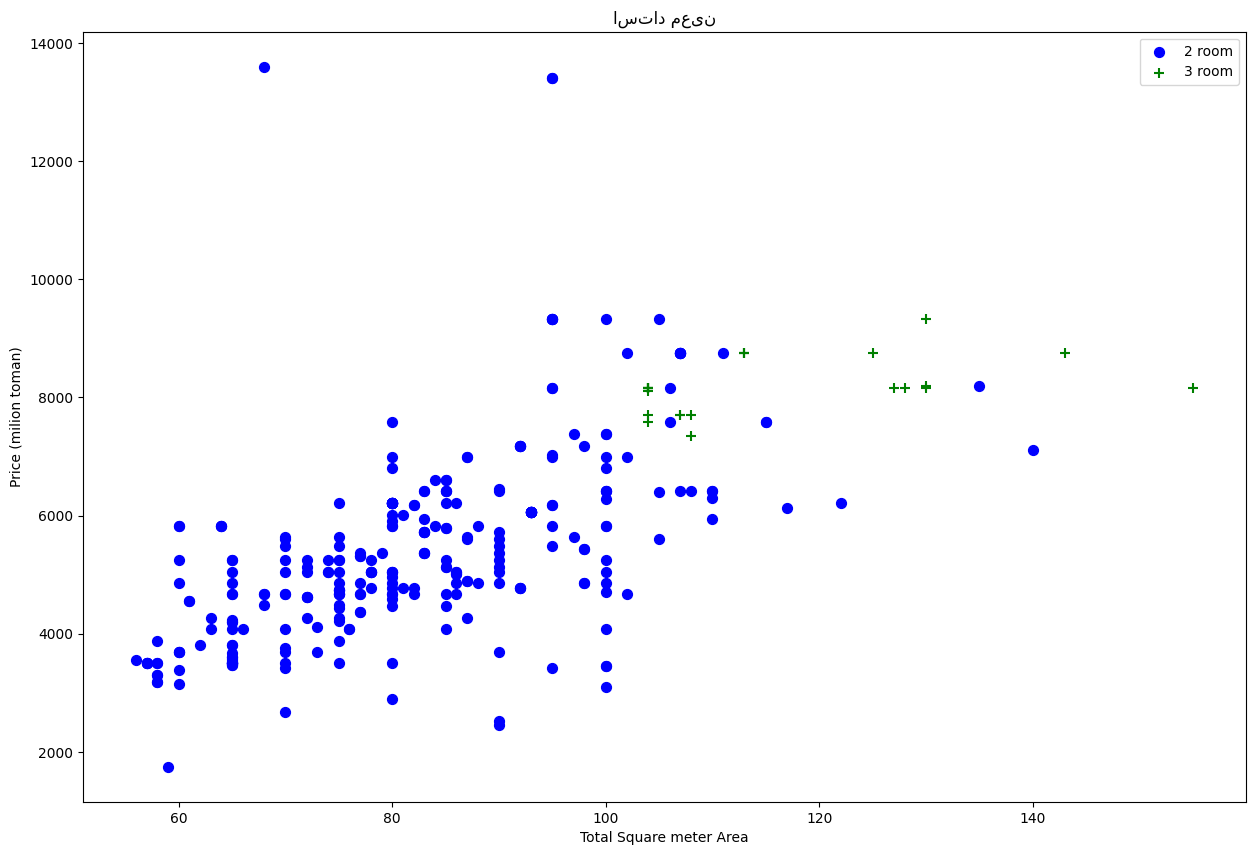

In [14]:
plot_scatter_chart(df3,'استاد معین')

In [15]:
#n=list(df3.rooms.unique())
#n.sort()
#t

In [16]:
#def reverse_room(x):
    #loc_index = n.index(x)
    #loc_index = loc_index + 1
    #b = -loc_index
    #return n[b]
#df3.rooms = df3.rooms.apply(reverse_room)

In [17]:
#df3[df3['rooms']==4]

In [18]:
def remove_rooms_outliers(df):
    exclude_indices = np.array([])
    for location, location_df in df.groupby('region'):
        rooms_stats= {}
        for rooms, rooms_df in location_df.groupby('rooms'):
            rooms_stats[rooms] = {
                'mean': np.mean(rooms_df.price_per_area),
                'std': np.std(rooms_df.price_per_area),
                'count': rooms_df.shape[0]
            }
        for rooms, rooms_df in location_df.groupby('rooms'):
            stats = rooms_stats.get(rooms-1)
            if stats and stats['count']>5:
                exclude_indices = np.append(exclude_indices, rooms_df[rooms_df.price_per_area<(stats['mean'])].index.values)
    return df.drop(exclude_indices, axis='index')

In [19]:
df4 = remove_rooms_outliers(df3)
df3 = df3.drop(['floor','price_per_area'], axis='columns')
df4 = df4.drop(['floor','price_per_area'], axis='columns')

In [20]:
df4.shape

(89581, 9)

In [21]:
df3.shape

(157567, 9)

In [22]:
dummies = pd.get_dummies(df4.region)
dummies3 = pd.get_dummies(df3.region)

In [23]:
df3 = pd.concat([df3,dummies3.drop('other', axis='columns')], axis='columns')
df4 = pd.concat([df4,dummies.drop('other', axis='columns')], axis='columns')

In [24]:
df3 = df3.drop(['region','district'], axis='columns')
df4 = df4.drop(['region','district'], axis='columns')

In [25]:
n=list(df3.rooms.unique())
n.sort()

In [26]:
def reverse_room(x):
    loc_index = n.index(x)
    loc_index = loc_index + 1
    b = -loc_index
    return n[b]
df3.rooms = df3.rooms.apply(reverse_room)

In [27]:
df4

,area,age,rooms,elavator,parking,Warehouse,price_m,آبشار تهران,آجودانیه,آذربایجان,...,کوهک,کوی بیمه,کوی فراز,کوی فردوس,کوی مهران,گرگان,گمرک,گیشا (کوی نصر),یافت‌آباد,یوسف‌آباد
1,52,1,1,1,0,1,3264,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,95,5,2,1,1,0,8745,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,36,11,1,0,0,0,2215,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,111,18,2,1,1,1,11660,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,80,28,1,0,0,0,4267,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
157596,115,2,2,1,1,1,13012,0,0,0,...,0,0,0,0,0,0,0,0,0,1
157597,105,8,2,1,1,1,11077,0,0,0,...,0,0,0,0,0,0,0,0,0,1
157598,139,0,3,1,1,1,21571,0,0,0,...,0,0,0,0,0,0,0,0,0,1
157603,60,26,0,0,0,1,4267,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [28]:
df4.elavator = df4.elavator.apply(lambda x: 1 if x ==0 else 0)
df4.parking = df4.parking.apply(lambda x: 1 if x ==0 else 0)
df4.Warehouse = df4.Warehouse.apply(lambda x: 1 if x ==0 else 0)

In [29]:
t=list(df4.rooms.unique())
t.sort()
t

[0, 1, 2, 3, 4]

In [30]:
def reverse_room(x):
    loc_index = t.index(x)
    loc_index = loc_index + 1
    b = -loc_index
    return t[b]
df4.rooms = df4.rooms.apply(reverse_room)

In [31]:
df4

,area,age,rooms,elavator,parking,Warehouse,price_m,آبشار تهران,آجودانیه,آذربایجان,...,کوهک,کوی بیمه,کوی فراز,کوی فردوس,کوی مهران,گرگان,گمرک,گیشا (کوی نصر),یافت‌آباد,یوسف‌آباد
1,52,1,3,0,1,0,3264,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,95,5,2,0,0,1,8745,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,36,11,3,1,1,1,2215,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,111,18,2,0,0,0,11660,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,80,28,3,1,1,1,4267,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
157596,115,2,2,0,0,0,13012,0,0,0,...,0,0,0,0,0,0,0,0,0,1
157597,105,8,2,0,0,0,11077,0,0,0,...,0,0,0,0,0,0,0,0,0,1
157598,139,0,1,0,0,0,21571,0,0,0,...,0,0,0,0,0,0,0,0,0,1
157603,60,26,4,1,1,0,4267,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [32]:
x = df4.drop('price_m', axis='columns')
x3 = df3.drop('price_m', axis='columns')
y = df4['price_m']
y3 = df3['price_m']

In [33]:
from sklearn.model_selection import train_test_split as tts
x_train , x_test , y_train , y_test = tts(x, y, test_size=0.2, random_state=10)
x3_train , x3_test , y3_train , y3_test = tts(x, y, test_size=0.2, random_state=10)

In [34]:
from sklearn.linear_model import LinearRegression as lr
lr_clf = lr()
lr_clf.fit(x_train,y_train)
lr_clf.score(x_test,y_test)

0.7861738116924684

In [35]:
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score

cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)
cross_val_score(lr(), x, y, cv=cv)

array([0.74717277, 0.73414362, 0.7548401 , 0.7150852 , 0.78194019])

In [36]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Lasso
from sklearn.tree import DecisionTreeRegressor


In [37]:
def find_best_model_using_gridsearchcv(x,y):
    algos = {
        'linear_regression' : {
            'model': lr(),
            'params':{
                'fit_intercept': [True, False]
            }
        },
        'lasso': {
            'model': Lasso(),
            'params': {
                'alpha': [1,2],
                'selection': ['random', 'cyclic']
                
            }
        },
        'decision_tree': {
            'model': DecisionTreeRegressor(),
            'params': {
                'criterion': ['mse', 'friedman_mse'],
                'splitter': ['best', 'random','squared_error','absolute_error','poisson']
            }
        }
    }
    scores = []
    cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)
    for algo_name, config in algos.items():
        gs = GridSearchCV(config['model'], config['params'], cv=cv, return_train_score=False)
        gs.fit(x,y)
        scores.append({
            'model': algo_name,
            'best_score': gs.best_score_,
            'best_params': gs.best_params_
        })
    return pd.DataFrame(scores, columns=['model','best_score','best_params'])

In [38]:
model= lr()
model.fit(x_train,y_train)
model.score(x_test,y_test)

0.7861738116924684

In [43]:
import pickle
with open('tehran_home_prices_model.pickle', 'wb') as f:
    pickle.dump(model,f)

In [45]:
import json
columns = {
    'data_columns' : [col.lower() for col in x.columns]
}
with open('columns.json', 'w') as f:
    f.write(json.dumps(columns))

In [46]:
model3= DecisionTreeRegressor(criterion='friedman_mse', splitter='random')
model3.fit(x_train,y_train)
model3.score(x_test,y_test)

0.8524360988969842

In [47]:
import pickle
with open('tehran_home_prices_model3.pickle', 'wb') as f:
    pickle.dump(model3,f)

In [40]:
model.feature_names_in_

array(['area', 'age', 'rooms', 'elavator', 'parking', 'Warehouse',
       'آبشار تهران', 'آجودانیه', 'آذربایجان', 'آذری', 'آسمان', 'آهنگ',
       'اباذر', 'ابوذر (منطقه ۱۵)', 'اختیاریه', 'ارامنه', 'ارم', 'ازگل',
       'استاد معین', 'استخر', 'اسکندری', 'افسریه', 'اقدسیه', 'المهدی',
       'الهیه', 'امام حسین(ع)', 'امانیه', 'امیرآباد', 'امیریه', 'اندیشه',
       'اندیشه (شهر زیبا)', 'اوقاف', 'اوین', 'اکباتان', 'باغ فردوس',
       'باغ فیض', 'بریانک', 'بهار', 'تجریش', 'تسلیحات', 'تهرانپارس شرقی',
       'تهرانپارس غربی', 'تهران\u200cسر', 'تهران\u200cنو', 'توانیر',
       'توحید', 'جردن', 'جلفا', 'جمال\u200cزاده', 'جمهوری',
       'جنت\u200cآباد جنوبی', 'جنت\u200cآباد شمالی',
       'جنت\u200cآباد مرکزی', 'جوادیه', 'جوادیه تهرانپارس', 'جی', 'جیحون',
       'حسین\u200cآباد', 'حشمتیه', 'حکمت', 'حکیمیه', 'خانی\u200cآباد نو',
       'خاک سفید', 'خزانه', 'خلیج فارس', 'خواجه نصیر طوسی',
       'خواجه نظام الملک', 'دارآباد', 'دانشگاه شریف',
       'دانشگاه علم و صنعت', 'دبستان', 'دربند', 'دردشت'

In [41]:
model.coef_

array([ 2.53057332e+02, -1.29478360e+02,  3.69799135e+03,  1.51855599e+03,
        6.67972441e+02,  2.81093752e+02, -2.03547432e+03,  2.03559383e+03,
        1.31754650e+03, -4.06295867e+02,  2.72883205e+03,  2.24180652e+02,
        9.56843962e+02, -2.11430599e+02,  1.45703285e+03,  9.62600361e+02,
        1.09579173e+03,  2.27106113e+03,  6.77495406e+02, -4.20944977e+02,
        1.21068454e+03, -1.14094153e+02,  6.37504233e+03,  1.39358591e+02,
        6.95962506e+03,  7.84131569e+02,  2.23652320e+03,  1.29314331e+03,
        4.83211794e+02, -3.53433215e+03, -2.28780334e+03, -9.19279421e+02,
        2.78316185e+03, -2.34538955e+03,  5.18341360e+03,  9.92530521e+02,
        6.02222069e+02,  8.37444276e+02,  2.40807913e+03,  1.20449838e+03,
       -6.87767012e+02, -3.30223944e+02, -2.95961971e+02,  7.35037141e+01,
       -1.38595698e+03,  2.31131018e+02,  2.27605426e+03,  1.61844894e+03,
        1.77764604e+03,  1.14343870e+03,  1.72306328e+02, -2.53453265e+02,
       -1.56033861e+02, -

In [87]:
model3.coef_

array([ 2.53057332e+02, -1.29478360e+02,  3.69799135e+03,  1.51855599e+03,
        6.67972441e+02, -2.81093752e+02, -2.03547432e+03,  2.03559383e+03,
        1.31754650e+03, -4.06295867e+02,  2.72883205e+03,  2.24180652e+02,
        9.56843962e+02, -2.11430599e+02,  1.45703285e+03,  9.62600361e+02,
        1.09579173e+03,  2.27106113e+03,  6.77495406e+02, -4.20944977e+02,
        1.21068454e+03, -1.14094153e+02,  6.37504233e+03,  1.39358591e+02,
        6.95962506e+03,  7.84131569e+02,  2.23652320e+03,  1.29314331e+03,
        4.83211794e+02, -3.53433215e+03, -2.28780334e+03, -9.19279421e+02,
        2.78316185e+03, -2.34538955e+03,  5.18341360e+03,  9.92530521e+02,
        6.02222069e+02,  8.37444276e+02,  2.40807913e+03,  1.20449838e+03,
       -6.87767012e+02, -3.30223944e+02, -2.95961971e+02,  7.35037141e+01,
       -1.38595698e+03,  2.31131018e+02,  2.27605426e+03,  1.61844894e+03,
        1.77764604e+03,  1.14343870e+03,  1.72306328e+02, -2.53453265e+02,
       -1.56033861e+02, -

In [48]:
df5 = df4[df4['کوی فردوس'] == 1]
df5[df5['rooms']==2]

,area,age,rooms,elavator,parking,Warehouse,price_m,آبشار تهران,آجودانیه,آذربایجان,...,کوهک,کوی بیمه,کوی فراز,کوی فردوس,کوی مهران,گرگان,گمرک,گیشا (کوی نصر),یافت‌آباد,یوسف‌آباد
150095,90,10,2,0,0,0,8640,0,0,0,...,0,0,0,1,0,0,0,0,0,0
150098,76,2,2,0,0,0,8278,0,0,0,...,0,0,0,1,0,0,0,0,0,0
150099,100,0,2,0,0,1,11077,0,0,0,...,0,0,0,1,0,0,0,0,0,0
150105,100,3,2,0,0,0,9328,0,0,0,...,0,0,0,1,0,0,0,0,0,0
150108,70,14,2,1,0,0,6413,0,0,0,...,0,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
153842,120,6,2,0,0,0,17490,0,0,0,...,0,0,0,1,0,0,0,0,0,0
153845,90,9,2,0,0,0,8162,0,0,0,...,0,0,0,1,0,0,0,0,0,0
153849,110,4,2,0,0,0,10494,0,0,0,...,0,0,0,1,0,0,0,0,0,0
153854,65,2,2,0,0,0,5830,0,0,0,...,0,0,0,1,0,0,0,0,0,0


In [90]:
df4

,area,age,rooms,elavator,parking,Warehouse,price_m,آبشار تهران,آجودانیه,آذربایجان,...,کوهک,کوی بیمه,کوی فراز,کوی فردوس,کوی مهران,گرگان,گمرک,گیشا (کوی نصر),یافت‌آباد,یوسف‌آباد
1,52,1,30,0,1,0,3264,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,95,5,29,0,0,1,8745,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,36,11,30,1,1,1,2215,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,111,18,29,0,0,0,11660,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,80,28,30,1,1,1,4267,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
157596,115,2,29,0,0,0,13012,0,0,0,...,0,0,0,0,0,0,0,0,0,1
157597,105,8,29,0,0,0,11077,0,0,0,...,0,0,0,0,0,0,0,0,0,1
157598,139,0,28,0,0,0,21571,0,0,0,...,0,0,0,0,0,0,0,0,0,1
157603,60,26,31,1,1,0,4267,0,0,0,...,0,0,0,0,0,0,0,0,0,1
